# Supervised Learning

# KNN

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

y_pred = knn.predict(X_test)

for i in range(5):
    print(y_pred[i],"  ",y_test.iloc[i])

#print("Prediction test")
#for i in range(5):
#    print(y_pred.take[i],"        ",y_test.take[i])
#for i,j in zip(y_pred,y_test):
#    print(i,"        ",j)

3    3
1    3
4    4
4    3
1    1


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         1
           3       0.75      0.38      0.50         8
           4       0.25      0.50      0.33         2

   micro avg       0.53      0.53      0.53        15
   macro avg       0.62      0.66      0.61        15
weighted avg       0.63      0.53      0.54        15



# LinearRegression

In [ ]:
A relationship between variables Y and X is represented by this equation:
Y`i = mX + b

In [25]:
from sklearn.datasets import load_boston
data = load_boston()

In [33]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

print("Train")
print(X_train)
print("Test")
print(X_test)

Train
[[3.15000e-02 9.50000e+01 1.47000e+00 ... 1.70000e+01 3.96900e+02
  4.56000e+00]
 [7.35341e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.64500e+01
  2.06200e+01]
 [2.31390e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.48130e+02
  1.20300e+01]
 ...
 [9.76170e-01 0.00000e+00 2.18900e+01 ... 2.12000e+01 2.62760e+02
  1.73100e+01]
 [1.77800e-02 9.50000e+01 1.47000e+00 ... 1.70000e+01 3.84300e+02
  4.45000e+00]
 [6.26300e-02 0.00000e+00 1.19300e+01 ... 2.10000e+01 3.91990e+02
  9.67000e+00]]
Test
[[5.08300e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.89710e+02
  5.68000e+00]
 [1.64390e-01 2.20000e+01 5.86000e+00 ... 1.91000e+01 3.74710e+02
  9.52000e+00]
 [3.54800e-02 8.00000e+01 3.64000e+00 ... 1.64000e+01 3.95180e+02
  9.25000e+00]
 ...
 [1.71420e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.96900e+02
  1.02100e+01]
 [1.22690e-01 0.00000e+00 6.91000e+00 ... 1.79000e+01 3.89390e+02
  9.55000e+00]
 [1.35472e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.76730e+02
  1.30400e+01]]


<function matplotlib.pyplot.show(*args, **kw)>

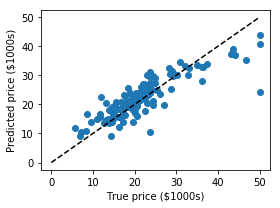

In [28]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.show

# SVM

<IMG src='/images/SVM2.JPG'>

<IMG src='/images/SVM.jpg'>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bankdata = pd.read_csv("bill_authentication.csv")
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']
print(bankdata.shape)
bankdata.head(5)

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("Prediction test")
for i in range(5):
    print(y_pred[i],"          ",y_test.iloc[i])

#for i,j in zip(y_pred,y_test):
#    print(i,"        ",j)

Prediction test
1            1
3            1
4            4
2            2
2            2


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[153   2]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.98      0.99      0.99       120

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Decision Tree for Classification

<ING src='dtree.jpg'>

<IMG src='/images/dtree.JPG'>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("bill_authentication.csv")


X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[157   3]
 [  5 110]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       160
           1       0.97      0.96      0.96       115

   micro avg       0.97      0.97      0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



# neural_network
Building the MLPClassifier
Finally, we will build the Multi-layer Perceptron classifier.


# Artificial Neural Network (Multilayer Perceptron)

<IMG src='/images/Capture.JPG'>

A neural network executes in two phases: Feed-Forward and Back Propagation.

Feed-Forward
Following are the steps performed during the feed-forward phase:

The values received in the input layer are multiplied with the weights. A bias is added to the summation of the inputs and weights in order to avoid null values.
Each neuron in the first hidden layer receives different values from the input layer depending upon the weights and bias. Neurons have an activation function that operates upon the value received from the input layer. The activation function can be of many types, like a step function, sigmoid function, relu function, or tanh function. As a rule of thumb, relu function is used in the hidden layer neurons and sigmoid function is used for the output layer neuron.
The outputs from the first hidden layer neurons are multiplied with the weights of the second hidden layer; the results are summed together and passed to the neurons of the proceeding layers. This process continues until the outer layer is reached. The values calculated at the outer layer are the actual outputs of the algorithm.
The feed-forward phase consists of these three steps. However, the predicted output is not necessarily correct right away; it can be wrong, and we need to correct it. The purpose of a learning algorithm is to make predictions that are as accurate as possible. To improve these predicted results, a neural network will then go through a back propagation phase. During back propagation, the weights of different neurons are updated in a way that the difference between the desired and predicted output is as small as possible.

In [96]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


In [54]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)
irisdata.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
X=irisdata[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y=irisdata['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [64]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Score test:",classifier.score(X_test, y_test))
print("Score train:",classifier.score(X_train, y_train))


[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Score test: 1.0
Score train: 0.9833333333333333


In [67]:
print("Prediction               test")
for i,j in zip(y_pred,y_test):
    print(i,"        ",j)

Prediction               test
Iris-versicolor          Iris-versicolor
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-virginica          Iris-virginica
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-virginica          Iris-virginica
Iris-virginica          Iris-virginica
Iris-virginica          Iris-virginica
Iris-virginica          Iris-virginica
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa   

# SVM with Iris

In [68]:
import pandas as pd

# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)
irisdata.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
from sklearn.model_selection import train_test_split


XX=irisdata[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y=irisdata['Class']


X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("Prediction test")
for i,j in zip(y_pred,y_test):
    print(i,"        ",j)

Prediction test
Iris-setosa          Iris-setosa
Iris-virginica          Iris-virginica
Iris-versicolor          Iris-versicolor
Iris-versicolor          Iris-versicolor
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-virginica          Iris-virginica
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-setosa          Iris-setosa
Iris-versicolor          Iris-versicolor
Iris-virginica          Iris-virginica
Iris-virginica          Iris-virginica
Iris-virginica          Iris-virginica
Iris-versicolor          Iris-versicolor
Iris-versicolor       

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Score test:",classifier.score(X_test, y_test))
print("Score train:",classifier.score(X_train, y_train))


[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Score test: 1.0
Score train: 0.9833333333333333
